# Data Cleaning

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/data.csv' , encoding='mac_roman')

In [ ]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [ ]:
missing_ratio = np.round(df.isna().sum()/len(df)*100,2)
missing_ratio = pd.DataFrame(missing_ratio , columns=['Missing_Ratio'])
missing_ratio.sort_values('Missing_Ratio',ascending=False)

#There are a lot of Missing Values in the data of column pm2_5 as missing ratio is very high

,Missing_Ratio
pm2_5,97.86
spm,54.48
agency,34.30
stn_code,33.06
rspm,9.23
so2,7.95
location_monitoring_station,6.31
no2,3.73
type,1.24
sampling_date,0.00


In [ ]:
df.drop(columns = 'pm2_5', inplace=True)

In [ ]:
list(df.columns)

['stn_code',
 'sampling_date',
 'state',
 'location',
 'agency',
 'type',
 'so2',
 'no2',
 'rspm',
 'spm',
 'location_monitoring_station',
 'date']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  date                         435735 non-null  object 
dtypes: float64(4), object(8)
memory usage: 39.9+ MB


In [ ]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
num_cols = list(df.select_dtypes(exclude=['object']).columns)

In [ ]:
print('\nNumerical Columns : ' , num_cols)
print('\nCategorical Columns : ' , cat_cols)


Numerical Columns :  ['so2', 'no2', 'rspm', 'spm']

Categorical Columns :  ['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type', 'location_monitoring_station', 'date']


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df = df[df['date'].isna()==False]

In [ ]:
print('The number of missing values are : ',df['type'].isna().sum())

The number of missing values are :  5390


In [ ]:
df['type'] = df['type'].fillna('NA')

In [ ]:
df['type'].value_counts()

Residential, Rural and other Areas    179013
Industrial Area                        96089
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8979
Sensitive Areas                         5536
NA                                      5390
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

In [ ]:
print('The number of missing values are : ',df['agency'].isna().sum()) #missing columns in the agency 

The number of missing values are :  149478


In [ ]:
df['agency'].fillna('NA',inplace=True)

In [ ]:
print('The number of missing values are : ',df['location_monitoring_station'].isna().sum())

The number of missing values are :  27488


In [ ]:
df['location_monitoring_station'].fillna('NA',inplace=True)

In [ ]:
print('The number of missing values are : ',df['location'].isna().sum())
print('The number of missing values are : ',df['state'].isna().sum())

The number of missing values are :  0
The number of missing values are :  0


cleaning of all the categorical columns is done.

Numericals columns handling

In [ ]:
num_cols

['so2', 'no2', 'rspm', 'spm']

In [ ]:
df['so2'].describe()

count    401092.000000
mean         10.829428
std          11.177239
min           0.000000
25%           5.000000
50%           8.000000
75%          13.700000
max         909.000000
Name: so2, dtype: float64

The above information shows that 75% of the values are within the value 13.7 and the maximum value is 909.0
This means that there are outliers

Distribution of SO2


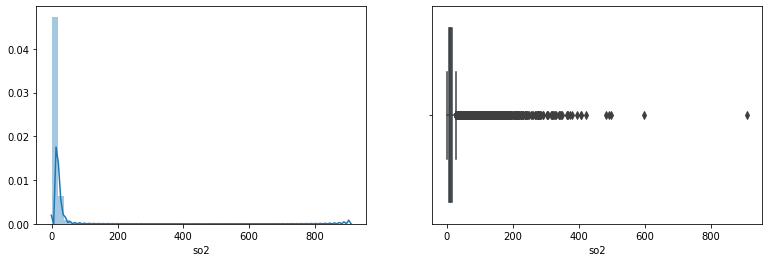

Skewness =  8.521026971966139


In [ ]:
print('Distribution of SO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['so2'].dropna() , ax=ax[0])
sns.boxplot(df['so2'].dropna() , ax=ax[1])

so2_skew = df['so2'].skew()
plt.show()
print('Skewness = ',so2_skew)

the box plot shows that there are significant amount of outliers.

distribution plot shows that 'so2' values are significantly Right Skewed(Positively Skewed)

In [ ]:
#Removing the outliers

Since we saw that 75% of the values lie under 13.7
we can calculate the upper limit using IQR(Inter Quartile Range) and
consider values outside upper limit as outliers and remove them

In [ ]:
Q1=df['so2'].quantile(0.25)
Q3=df['so2'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['so2']<(Q1-1.5*IQR))|(df['so2']>(Q3+1.5*IQR)))]

Distribution of SO2


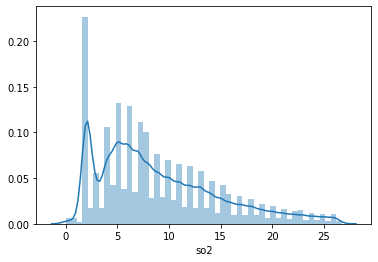

Skewness =  0.8881595669996004


In [ ]:
print('Distribution of SO2')
sns.distplot(df['so2'].dropna())

so2_skew = df['so2'].skew()
plt.show()
print('Skewness = ',so2_skew)

In [ ]:
print('The number of missing values in SO2 are : ' , df['so2'].isna().sum())

The number of missing values in SO2 are :  34643


**Kernel Density Estimate(KDE) Plot Visualization is used for visualizing the Probability Density**

Distribution of SO2


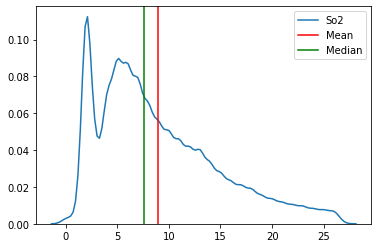

In [ ]:
print('Distribution of SO2')
sns.kdeplot(df['so2'].dropna())
plt.axvline(df['so2'].mean(), color='r')
plt.axvline(df['so2'].median(), color='g')

plt.legend(['So2','Mean','Median'])
plt.show()

In [ ]:
df1= df.copy()
df2=df.copy()

Treating the missing values 
1. Mean imputation
2. Forwards filling

In [ ]:
df1['so2'] = df1['so2'].fillna(df1['so2'].mean())

In [ ]:
df1['so2'] = df1['so2'].fillna(method='ffill')

Distribution of SO2


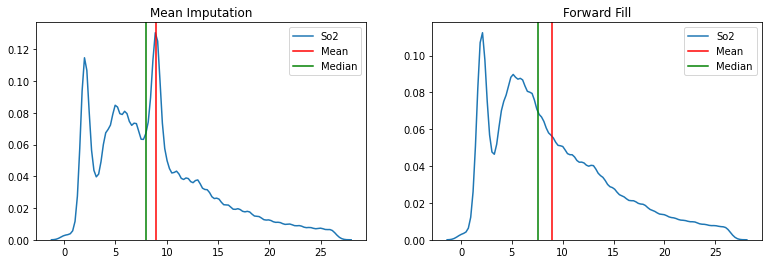

In [ ]:
print('Distribution of SO2')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['so2'] , ax=ax[0])
ax[0].axvline(df1['so2'].mean(), color='r' )
ax[0].axvline(df1['so2'].median(), color='g')
ax[0].set_title('Mean Imputation')  
ax[0].legend(['So2','Mean','Median'])

sns.kdeplot(df2['so2'] , ax=ax[1])
ax[1].axvline(df2['so2'].mean(), color='r')
ax[1].axvline(df2['so2'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['So2','Mean','Median'])
                    
                    
plt.show()

plots show that filling the missing values with Forward Fill dosen't cause any variation on the data, so we can choose Forward Fill

In [ ]:
df['so2'] = df['so2'].fillna(method='ffill')

In [ ]:
# for no2 column
df['no2'].describe()

count    396375.000000
mean         24.734928
std          17.113930
min           0.000000
25%          13.800000
50%          21.000000
75%          31.000000
max         876.000000
Name: no2, dtype: float64

75% of the values are within the value 30.8 and the maximum value is 876.0
This means that there are outliers

Distribution of NO2


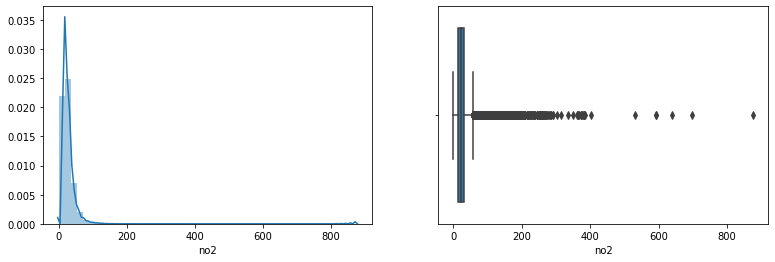

Skewness =  3.5414717457036953


In [ ]:
print('Distribution of NO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['no2'].dropna() , ax=ax[0])
sns.boxplot(df['no2'].dropna() , ax=ax[1])
no2_skew = df['no2'].skew()
plt.show()
print('Skewness = ',no2_skew)

In [ ]:
#removing outliers by calculating upper limit using IQR

Q1=df['no2'].quantile(0.25)
Q3=df['no2'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['no2']<(Q1-1.5*IQR))|(df['no2']>(Q3+1.5*IQR)))]

Distribution of NO2


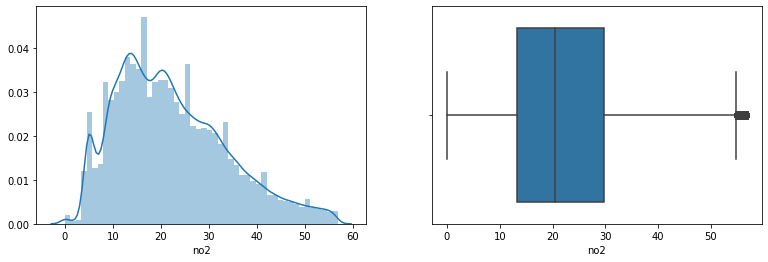

Skewness =  0.6614815004927441


In [ ]:
print('Distribution of NO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['no2'].dropna() , ax=ax[0])
sns.boxplot(df['no2'].dropna() , ax=ax[1])
no2_skew = df['no2'].skew()
plt.show()
print('Skewness = ',no2_skew)

In [ ]:
# Treating missing values



print('The number of missing values in NO2 are : ' , df['no2'].isna().sum())

The number of missing values in NO2 are :  16167


Distribution of NO2


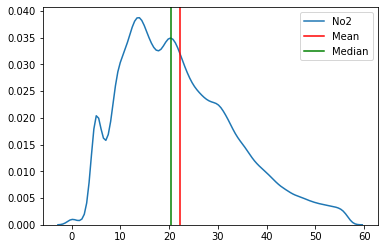

In [ ]:
print('Distribution of NO2')
sns.kdeplot(df['no2'])
plt.axvline(df['no2'].mean(), color='r')
plt.axvline(df['no2'].median(), color='g')
plt.legend(['No2','Mean','Median'])
plt.show()

In [ ]:
df1 = df.copy()
df2 = df.copy()

In [ ]:
#Mean Imputation
df1['no2'] = df1['no2'].fillna(df1['no2'].mean())
#Forward Fill
df2['no2'] = df2['no2'].fillna(method='ffill')

Distribution of NO2


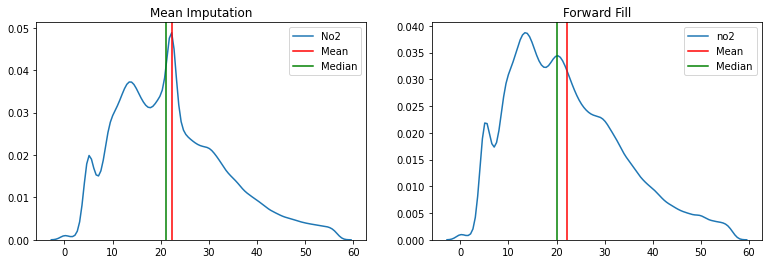

In [ ]:
print('Distribution of NO2')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['no2'] , ax=ax[0])
ax[0].axvline(df1['no2'].mean(), color='r' )
ax[0].axvline(df1['no2'].median(), color='g')
ax[0].set_title('Mean Imputation')    
ax[0].legend(['No2','Mean','Median'])

sns.kdeplot(df2['no2'] , ax=ax[1])
ax[1].axvline(df2['no2'].mean(), color='r')
ax[1].axvline(df2['no2'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['no2','Mean','Median'])
                    
                    
plt.show()

In [ ]:
# forward filling doesnot cause any variation in the data

df['no2'] = df['no2'].fillna(method='ffill')



In [ ]:
df['rspm'].describe()

count    361301.000000
mean        104.466161
std          71.131097
min           0.000000
25%          55.000000
50%          87.000000
75%         135.000000
max        6307.033333
Name: rspm, dtype: float64

The above information shows that 75% of the values are within the value 135.0 and the maximum value is 6307.03
This means that there are outliers

Distribution of RSPM


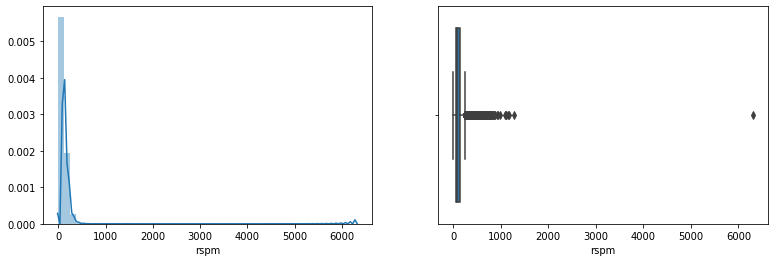

Skewness =  3.5635618320679323


In [ ]:
print('Distribution of RSPM')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['rspm'].dropna() , ax=ax[0])
sns.boxplot(df['rspm'].dropna() , ax=ax[1])
plt.show()
print('Skewness = ',df['rspm'].skew())

In [ ]:
Q1=df['rspm'].quantile(0.25)
Q3=df['rspm'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['rspm']<(Q1-1.5*IQR))|(df['rspm']>(Q3+1.5*IQR)))]

Distribution of RSPM


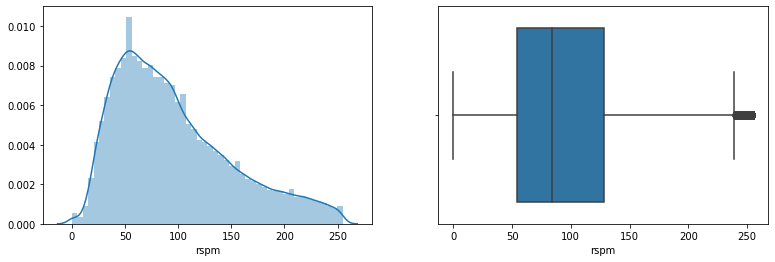

Skewness =  0.8297993158420551


In [ ]:
print('Distribution of RSPM')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(df['rspm'].dropna() , ax=ax[0])
sns.boxplot(df['rspm'].dropna() , ax=ax[1])
plt.show()
print('Skewness = ',df['rspm'].skew())

In [ ]:
print('The number of missing values in RSPM are : ' , df['rspm'].isna().sum())

The number of missing values in RSPM are :  33626


In [ ]:
df1 = df.copy()
df2 = df.copy()

In [ ]:
#Mean Imputation
df1['rspm'] = df1['rspm'].fillna(df1['rspm'].mean())
#Forward Fill
df2['rspm'] = df2['rspm'].fillna(method='ffill')

Distribution of RSPM


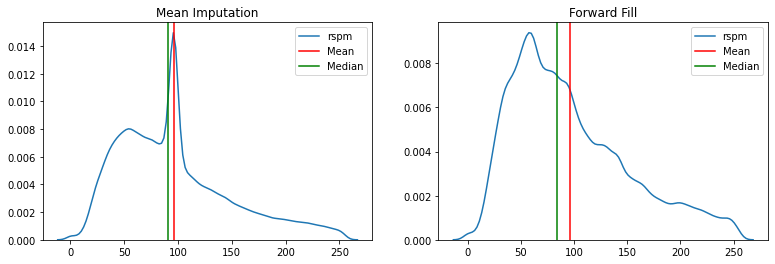

In [ ]:
print('Distribution of RSPM')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['rspm'] , ax=ax[0])
ax[0].axvline(df1['rspm'].mean(), color='r' )
ax[0].axvline(df1['rspm'].median(), color='g')
ax[0].set_title('Mean Imputation')    
ax[0].legend(['rspm','Mean','Median'])

sns.kdeplot(df2['rspm'] , ax=ax[1])
ax[1].axvline(df2['rspm'].mean(), color='r')
ax[1].axvline(df2['rspm'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['rspm','Mean','Median'])
                    
                    
plt.show()

In [ ]:
df['rspm'] = df['rspm'].fillna(method='ffill')

In [ ]:
df["pm2_5"] = df["pm2_5"].fillna(0)
df["spm"] = df["spm"].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381558 entries, 0 to 435738
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   stn_code                     255014 non-null  object        
 1   sampling_date                381558 non-null  object        
 2   state                        381558 non-null  object        
 3   location                     381558 non-null  object        
 4   agency                       381558 non-null  object        
 5   type                         381558 non-null  object        
 6   so2                          381558 non-null  float64       
 7   no2                          381558 non-null  float64       
 8   rspm                         380654 non-null  float64       
 9   spm                          381558 non-null  float64       
 10  location_monitoring_station  381558 non-null  object        
 11  pm2_5                     

In [ ]:
#df.to_csv ('CleanedDataset.csv', index = False, header=True)
print(df)

       stn_code       sampling_date  ... pm2_5       date
0           150  February - M021990  ...   0.0 1990-02-01
1           151  February - M021990  ...   0.0 1990-02-01
2           152  February - M021990  ...   0.0 1990-02-01
3           150     March - M031990  ...   0.0 1990-03-01
4           151     March - M031990  ...   0.0 1990-03-01
...         ...                 ...  ...   ...        ...
435734     SAMP            15-12-15  ...   0.0 2015-12-15
435735     SAMP            18-12-15  ...   0.0 2015-12-18
435736     SAMP            21-12-15  ...   0.0 2015-12-21
435737     SAMP            24-12-15  ...   0.0 2015-12-24
435738     SAMP            29-12-15  ...   0.0 2015-12-29

[381558 rows x 13 columns]
